In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1: The Eight Schools

Students at eight schools each participated in a test-prep program. After examination, the average score improvement $ \Delta S$ for each school was recorded, along with the uncertainty on this measurement $ \sigma( \Delta S)$:

   + $ \Delta S$ = [28, 8, -3, 7, -1, 1, 18, 12]

   + $ \sigma( \Delta S$) = [15, 10, 16, 11, 9, 11, 10, 18]

In [2]:
improv = np.array([28,8,-3,7,-1,1,18,12])
sigma_improv = np.array([15,10,16,11,9,11,10,18])

Text(0.5, 0, 'School #')

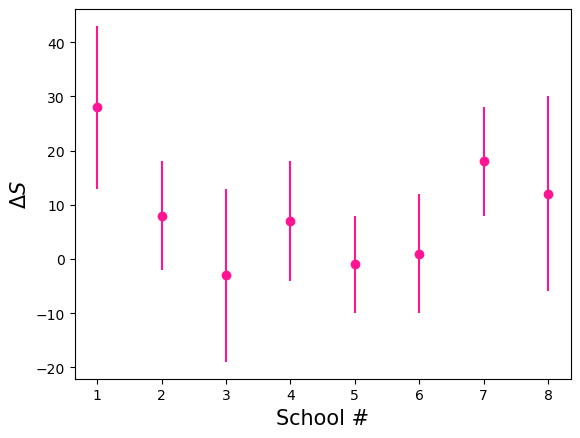

In [3]:
x_rng = np.arange(1,9)
plt.errorbar(x_rng, improv, yerr = sigma_improv, fmt='o', c='deeppink')
plt.ylabel(r"$\Delta S$", fontsize=15)
plt.xlabel("School #", fontsize=15)

a) Calculate the pooled mean improvement and uncertainty on the mean

the pooled mean improvement = 8.75
the pooled mean uncertainty = 12.5


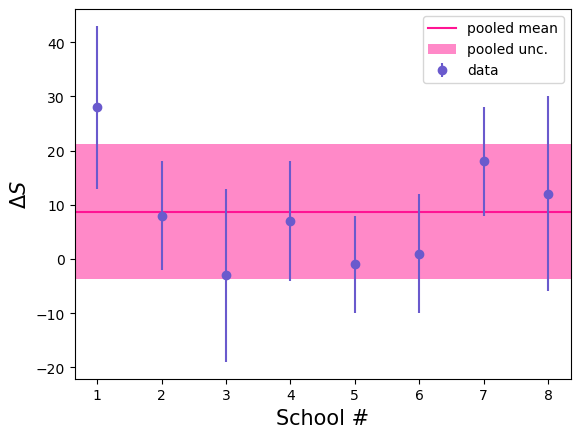

In [4]:
pooled_mean, pooled_unc = np.mean(improv), np.mean(sigma_improv)
print(f"the pooled mean improvement = {pooled_mean}\nthe pooled mean uncertainty = {pooled_unc}")
x_rng = np.arange(1,9)


plt.axhline(pooled_mean, c='deeppink', label='pooled mean')
plt.axhspan(pooled_mean + pooled_unc, pooled_mean - pooled_unc, facecolor='deeppink', alpha=0.5, label='pooled unc.')

plt.errorbar(x_rng, improv, yerr = sigma_improv, fmt='o', c='slateblue', label='data')
plt.ylabel(r"$\Delta S$", fontsize=15)
plt.xlabel("School #", fontsize=15)
plt.legend()

b) Fit the data using a hierarchical modeling. Assuming the score improvements $\theta = \Delta S$ were drawn from a population that can be modeled as a Gaussian with mean $\mu$ and uncertainty $\sigma$.

* i. Draw your hyperparameters $\alpha = \{\mu, \sigma\}$ from a Gaussian and Half-Cauchy distribution, respectively
* ii. Test other choices of distributions for the hyper-priors and population. How sensitive are the results?

Sample from the posterior using a sampling method of your choice. Test the sampler runs for convergence. Explore sampler behavior when using centered vs. off-centered parameterization.

In [25]:
import numpyro
import numpyro.distributions as dist
from jax import random
from numpyro.infer import MCMC, NUTS
import corner
import arviz as az

In [6]:
# Eight Schools example
def eight_schools(J, sigma, y=None):
    mu = numpyro.sample('mu', dist.Normal(0, 5))
    tau = numpyro.sample('tau', dist.HalfCauchy(5))
    with numpyro.plate('J', J):
        theta = numpyro.sample('theta', dist.Normal(mu, tau))
        numpyro.sample('obs', dist.Normal(theta, sigma), obs=y)


nuts_kernel = NUTS(eight_schools)
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=1000)
rng_key = random.PRNGKey(0)
mcmc.run(rng_key, J=8, sigma=sigma_improv, y=improv, extra_fields=('potential_energy',))

sample: 100%|██████████| 1500/1500 [00:02<00:00, 701.23it/s, 31 steps of size 1.26e-01. acc. prob=0.84] 


In [ ]:
inf_data = az.from_numpyro(mcmc)
az.summary(inf_data)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,4.184,3.165,-1.143,10.526,0.253,0.184,158.0,236.0,NaN
tau,3.578,2.869,0.427,8.822,0.316,0.224,51.0,36.0,NaN
theta[0],5.983,5.164,-2.535,17.022,0.340,0.241,223.0,436.0,NaN
theta[1],4.779,4.669,-3.612,13.848,0.279,0.198,253.0,423.0,NaN
theta[2],3.849,5.086,-6.708,12.420,0.315,0.223,240.0,415.0,NaN
theta[3],4.533,4.571,-4.523,12.774,0.267,0.197,277.0,438.0,NaN
theta[4],3.456,4.665,-6.000,11.615,0.296,0.209,242.0,557.0,NaN
theta[5],3.978,4.795,-4.589,13.699,0.291,0.224,263.0,380.0,NaN
theta[6],5.918,5.000,-3.639,14.165,0.312,0.221,230.0,396.0,NaN
theta[7],4.734,5.111,-6.091,12.805,0.294,0.212,266.0,359.0,NaN


Text(0.5, 0.98, 'hyperprior sampling, warmup=500, samples=1000')

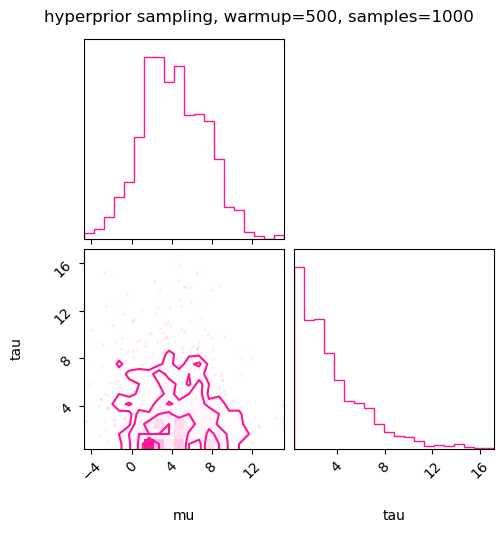

In [41]:
corner.corner(inf_data, var_names=["mu", "tau"], color='deeppink');
plt.suptitle('hyperprior sampling, warmup=500, samples=1000')

Text(0.5, 0.98, 'prior sampling, warmup=500, samples=1000')

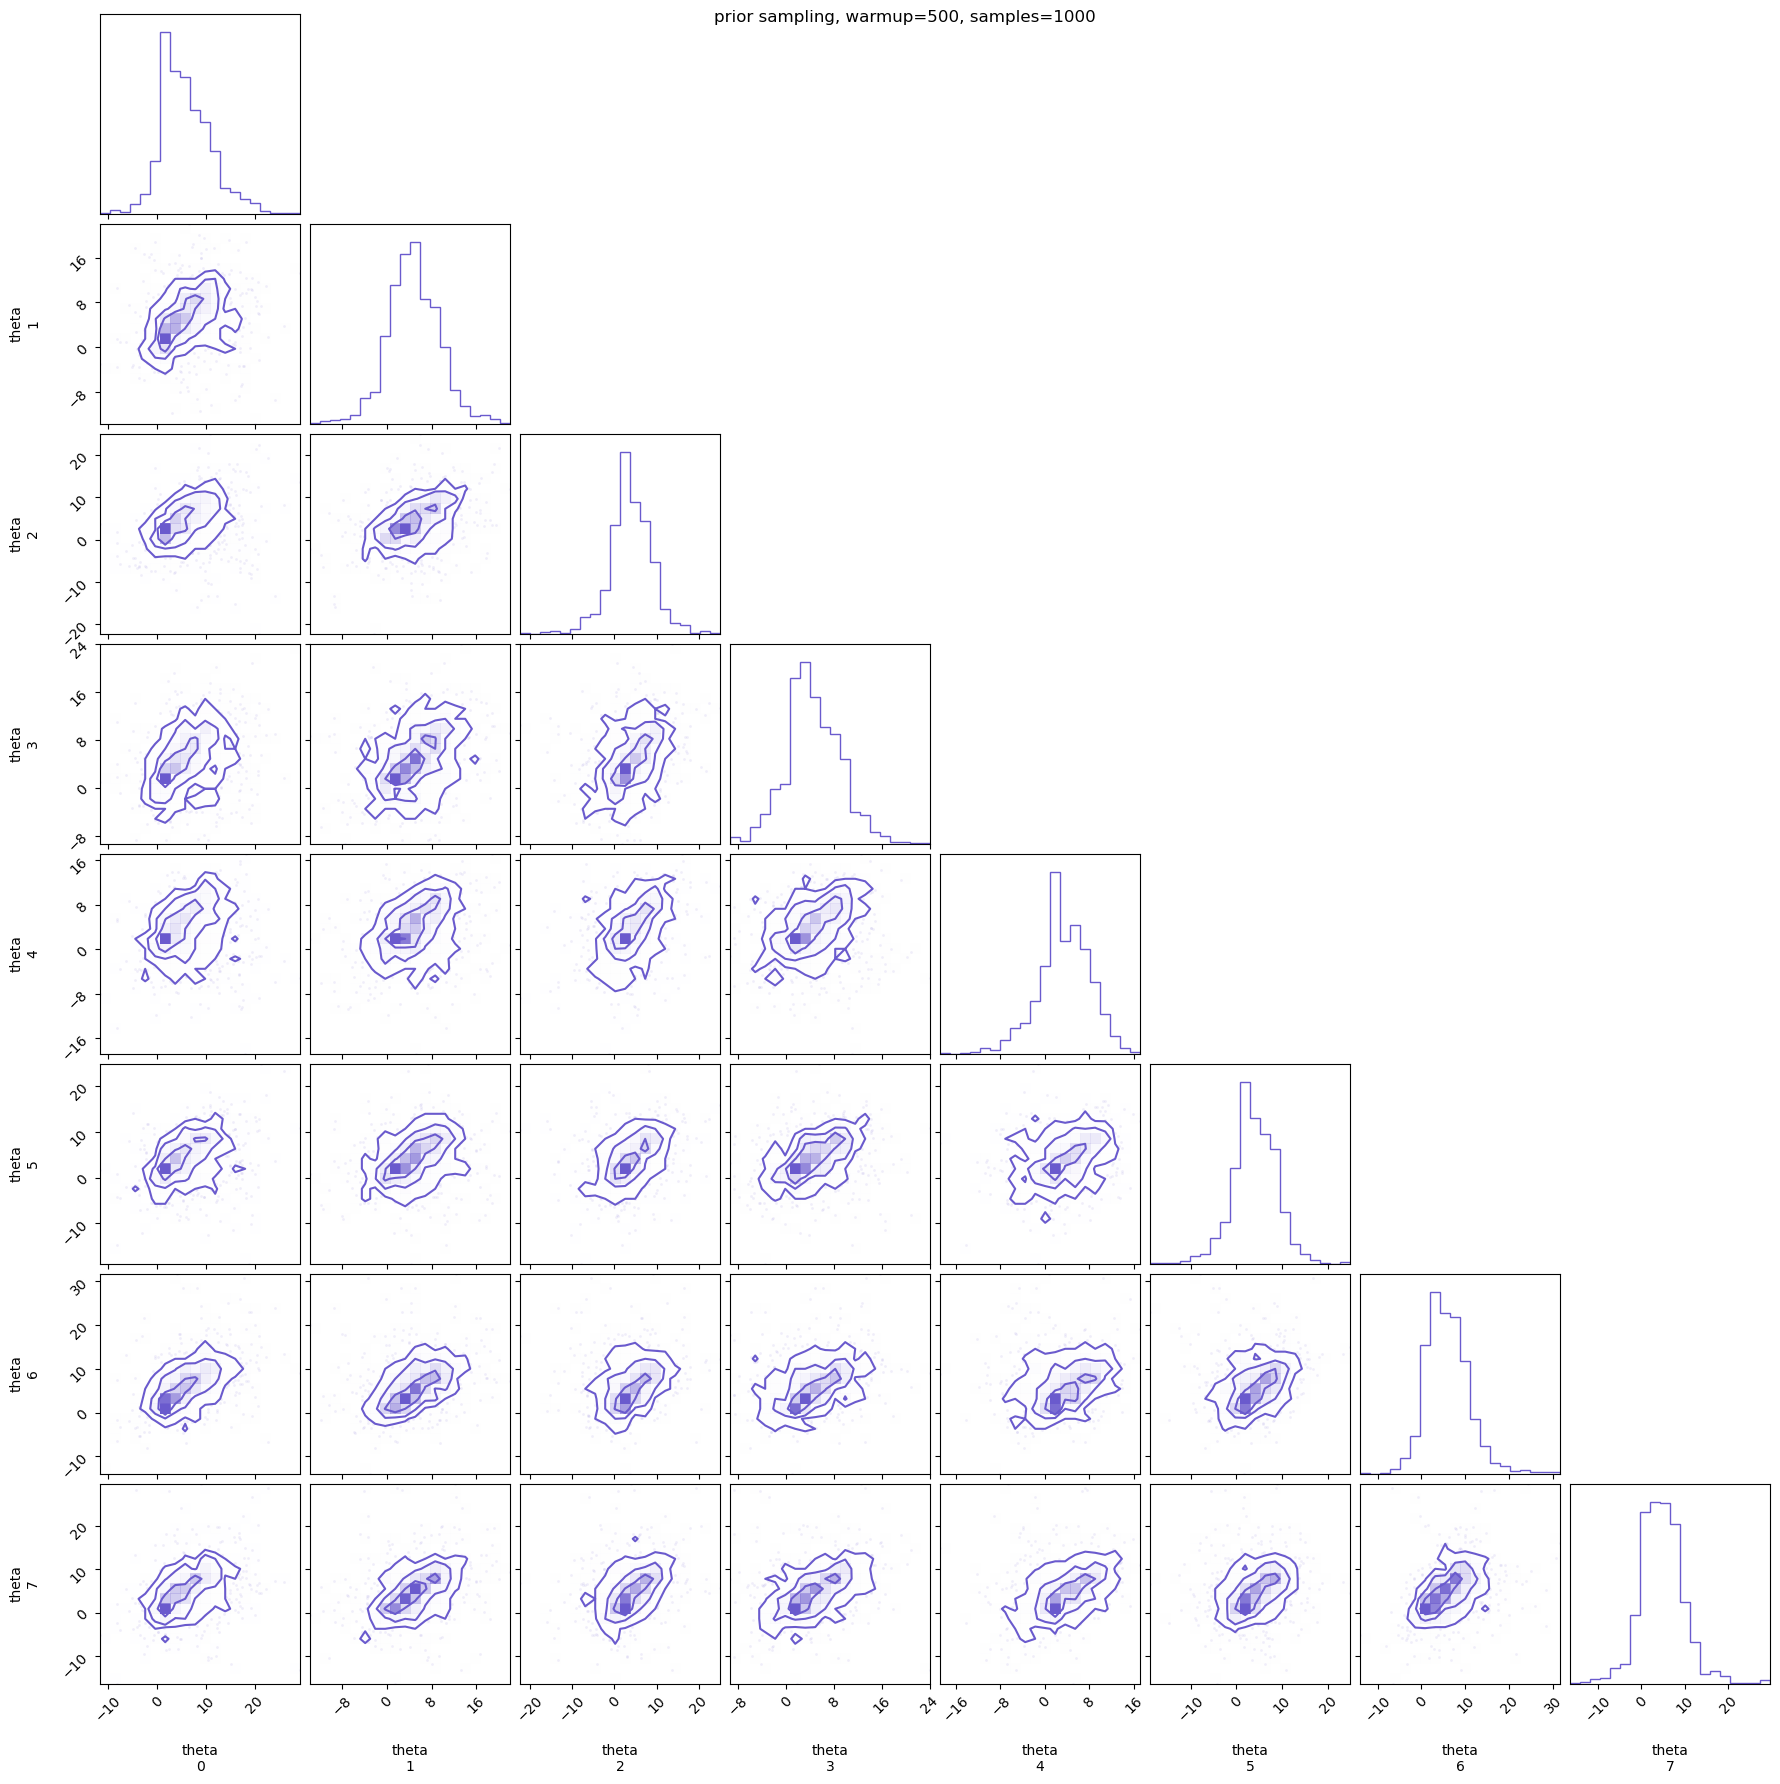

In [42]:
corner.corner(inf_data, var_names=["theta"], color='slateblue');
plt.suptitle('prior sampling, warmup=500, samples=1000')

*I don't like how sparse these corner plots look, I am going to increase the number of samples*

sample: 100%|██████████| 9000/9000 [00:03<00:00, 2278.15it/s, 127 steps of size 4.32e-02. acc. prob=0.97]


Text(0.5, 0.98, 'hyperprior sampling, warmup=1000, samples=8000')

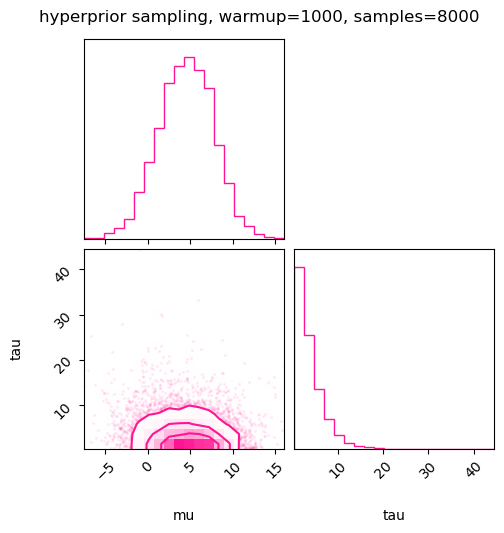

In [44]:
nuts_kernel = NUTS(eight_schools)
mcmc_moresamples = MCMC(nuts_kernel, num_warmup=1000, num_samples=8000)
rng_key = random.PRNGKey(0)
mcmc_moresamples.run(rng_key, J=8, sigma=sigma_improv, y=improv, extra_fields=('potential_energy',))

inf_data_moresamples = az.from_numpyro(mcmc_moresamples)

corner.corner(inf_data_moresamples, var_names=["mu", "tau"], color='deeppink');
plt.suptitle('hyperprior sampling, warmup=1000, samples=8000')


Text(0.5, 0.98, 'prior sampling, warmup=1000, samples=8000')

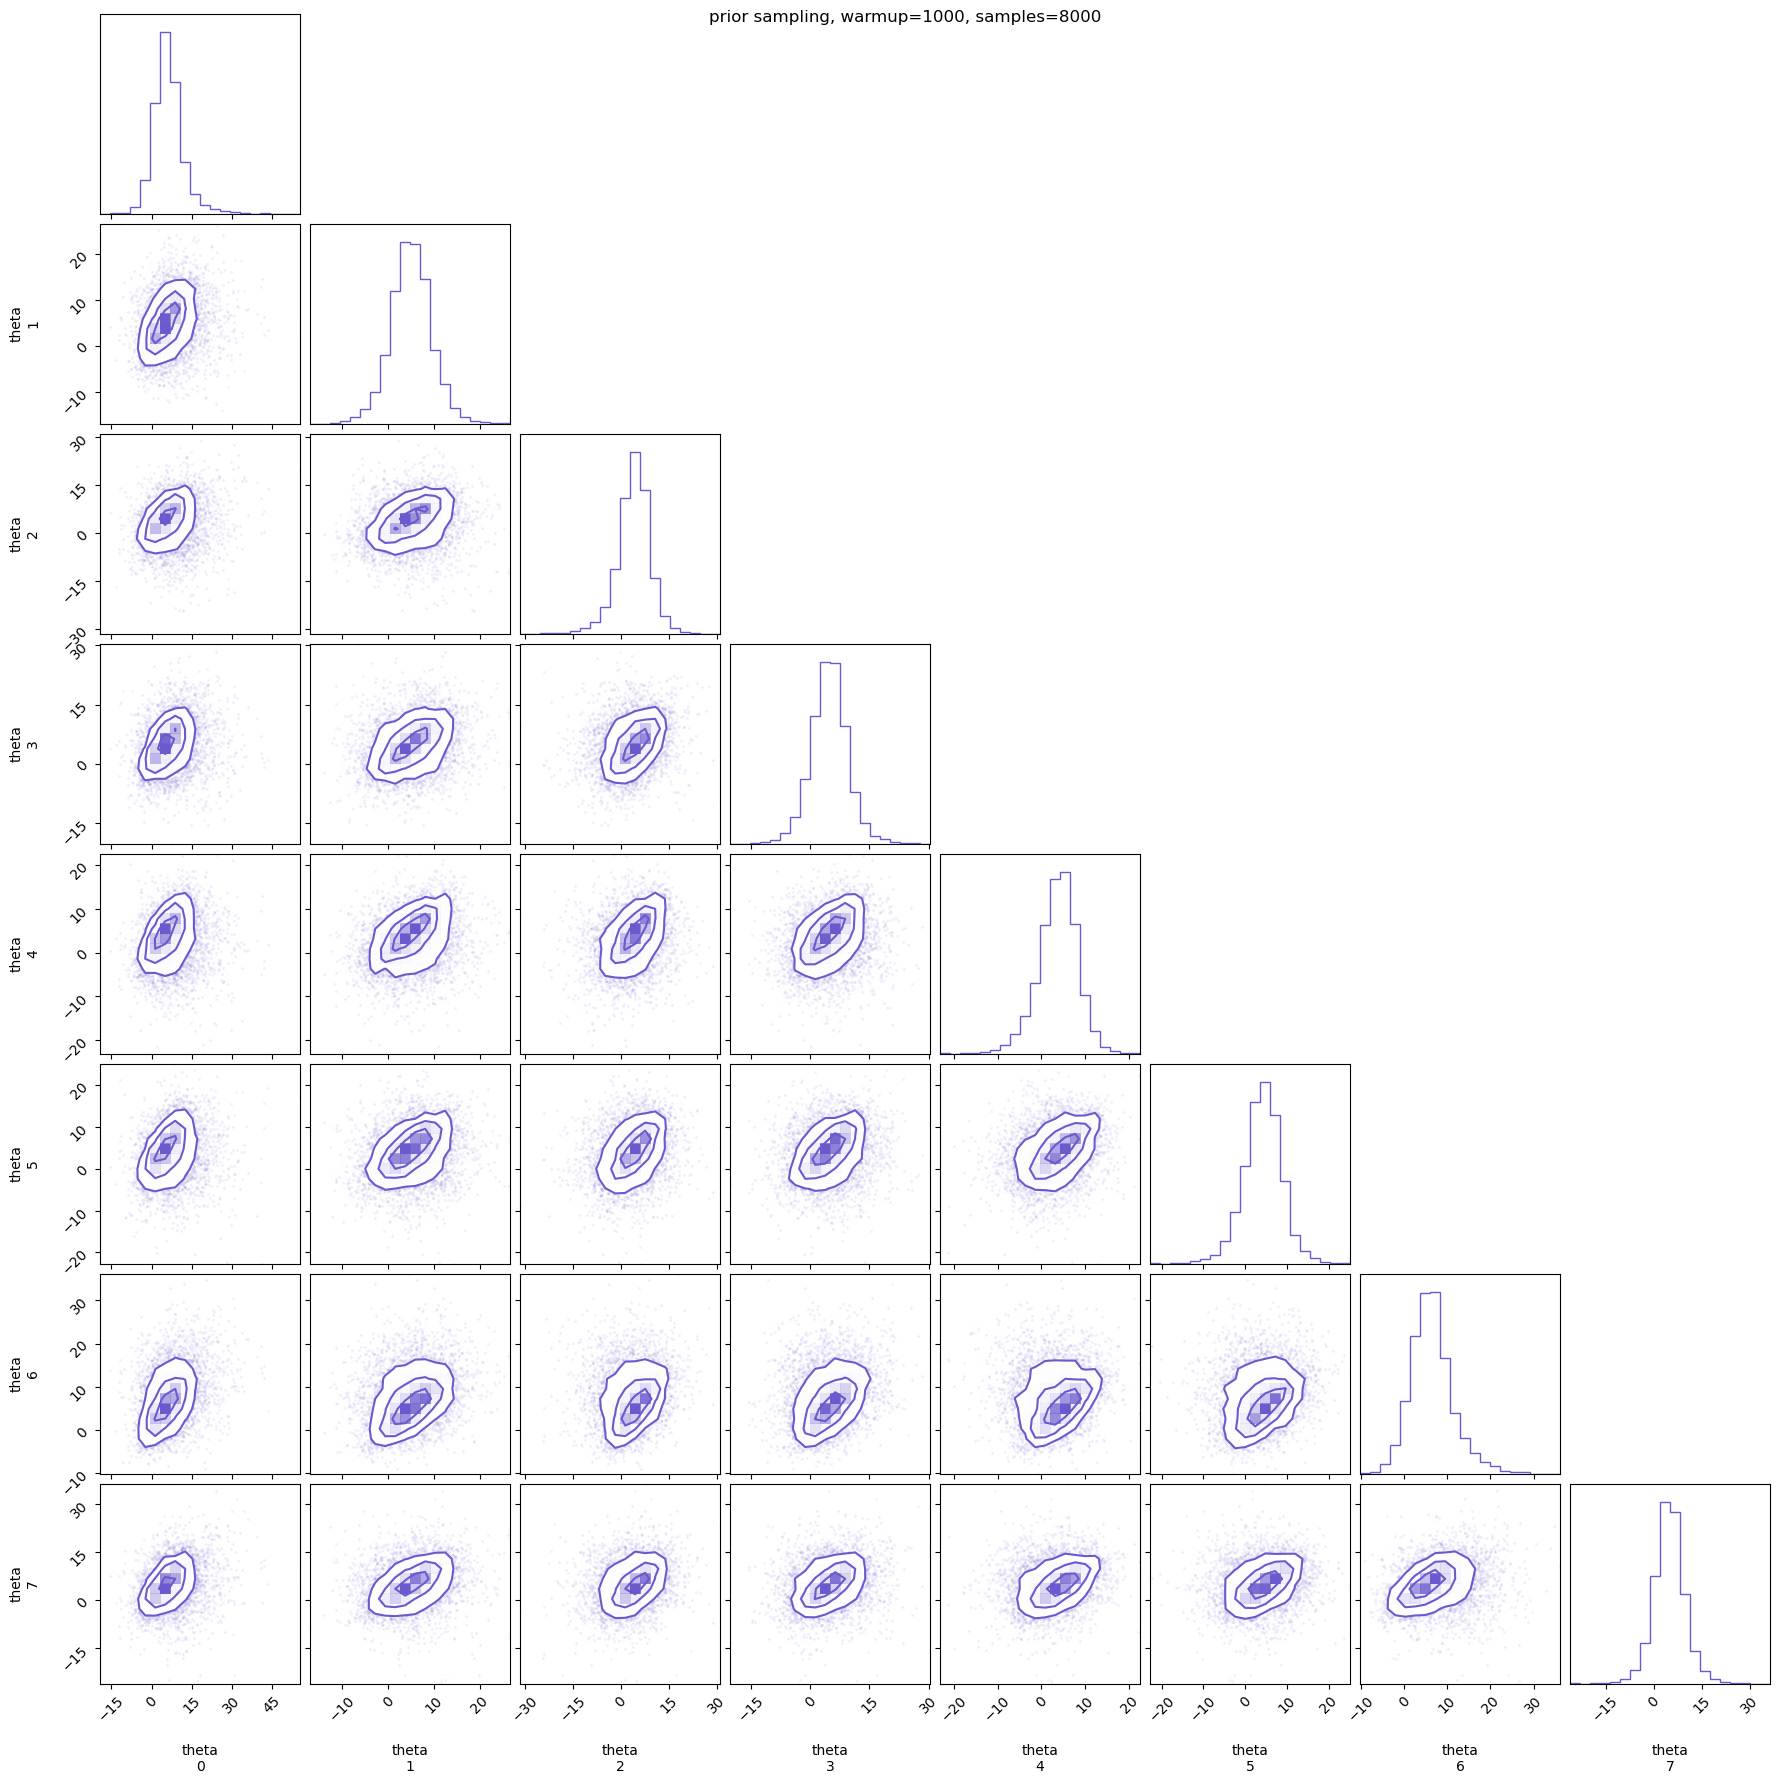

In [45]:
corner.corner(inf_data_moresamples, var_names=["theta"], color='slateblue');
plt.suptitle('prior sampling, warmup=1000, samples=8000')

In [47]:
mcmc_moresamples.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
        mu      4.48      3.24      4.56     -0.83      9.61    893.93      1.00
       tau      3.68      3.29      2.81      0.19      7.80    467.58      1.00
  theta[0]      6.33      5.60      5.85     -2.38     14.50   1263.75      1.00
  theta[1]      5.02      4.54      4.97     -1.96     12.67   1835.65      1.00
  theta[2]      3.99      5.22      4.23     -3.94     12.42   1738.48      1.00
  theta[3]      4.81      4.76      4.83     -2.59     12.61   1717.25      1.00
  theta[4]      3.71      4.62      4.03     -3.55     11.27   1389.71      1.00
  theta[5]      4.16      4.71      4.32     -3.55     11.40   1664.42      1.00
  theta[6]      6.53      5.01      6.11     -1.55     14.19   1201.51      1.00
  theta[7]      4.91      5.06      4.89     -3.16     12.68   1827.71      1.00

Number of divergences: 14


*citing results from this sampling with warmup,samples=1000,8000, and guassian & half-cauchy hyperpriors, add results to the plot from before*

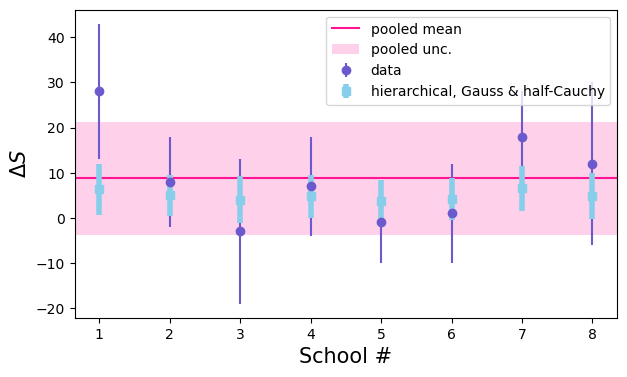

In [ ]:
plt.figure(figsize=(7,4))
plt.axhline(pooled_mean, c='deeppink', label='pooled mean')
plt.axhspan(pooled_mean + pooled_unc, pooled_mean - pooled_unc, facecolor='deeppink', alpha=0.2, label='pooled unc.')

plt.errorbar(x_rng, improv, yerr = sigma_improv, fmt='o', c='slateblue', label='data', )
plt.ylabel(r"$\Delta S$", fontsize=15)
plt.xlabel("School #", fontsize=15)
#plt.legend()
#plt.show()


hier_mean = np.array([6.33,5.02,3.99,4.81,3.71,4.16,6.53,4.91])
hier_std = np.array([5.60,4.54,5.22,4.76,4.62,4.71,5.01,5.06])
plt.errorbar(x_rng, hier_mean, yerr = hier_std, fmt='s', c='skyblue', lw=4, label='hierarchical, Gauss & half-Cauchy')
#plt.ylabel(r"$\Delta S$", fontsize=15)
#plt.xlabel("School #", fontsize=15)
plt.legend()
plt.show()

*let's investigate the effects of different hyperprior distributions!*

sample: 100%|██████████| 9000/9000 [00:03<00:00, 2358.18it/s, 7 steps of size 1.48e-01. acc. prob=0.82] 


Text(0.5, 0.98, 'hyperprior sampling shifted & widened gaussian distr. on mu')

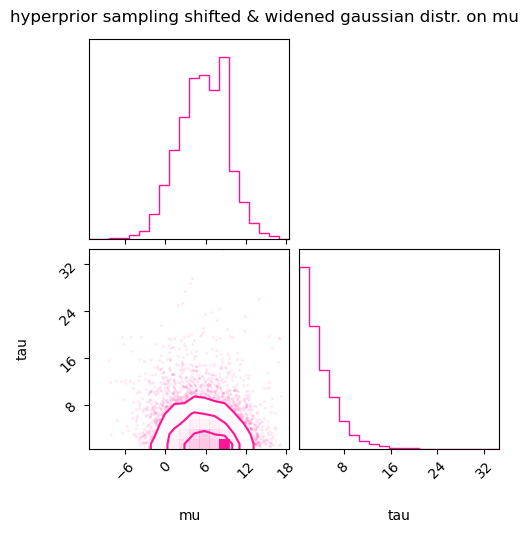

In [61]:
# Eight Schools example
def eight_schools_newhyper(J, sigma, y=None):
    mu = numpyro.sample('mu', dist.Normal(1, 6))
    tau = numpyro.sample('tau', dist.HalfCauchy(5))
    with numpyro.plate('J', J):
        theta = numpyro.sample('theta', dist.Normal(mu, tau))
        numpyro.sample('obs', dist.Normal(theta, sigma), obs=y)

nuts_kernel_newhyper = NUTS(eight_schools_newhyper)
mcmc_newhyper = MCMC(nuts_kernel_newhyper, num_warmup=1000, num_samples=8000)
rng_key = random.PRNGKey(0)
mcmc_newhyper.run(rng_key, J=8, sigma=sigma_improv, y=improv, extra_fields=('potential_energy',))

inf_data_newhyper = az.from_numpyro(mcmc_newhyper)

corner.corner(inf_data_newhyper, var_names=["mu", "tau"], color='deeppink');
plt.suptitle('hyperprior sampling shifted & widened gaussian distr. on mu')

Text(0.5, 0.98, 'prior sampling shifted & widened gaussian distr. on mu')

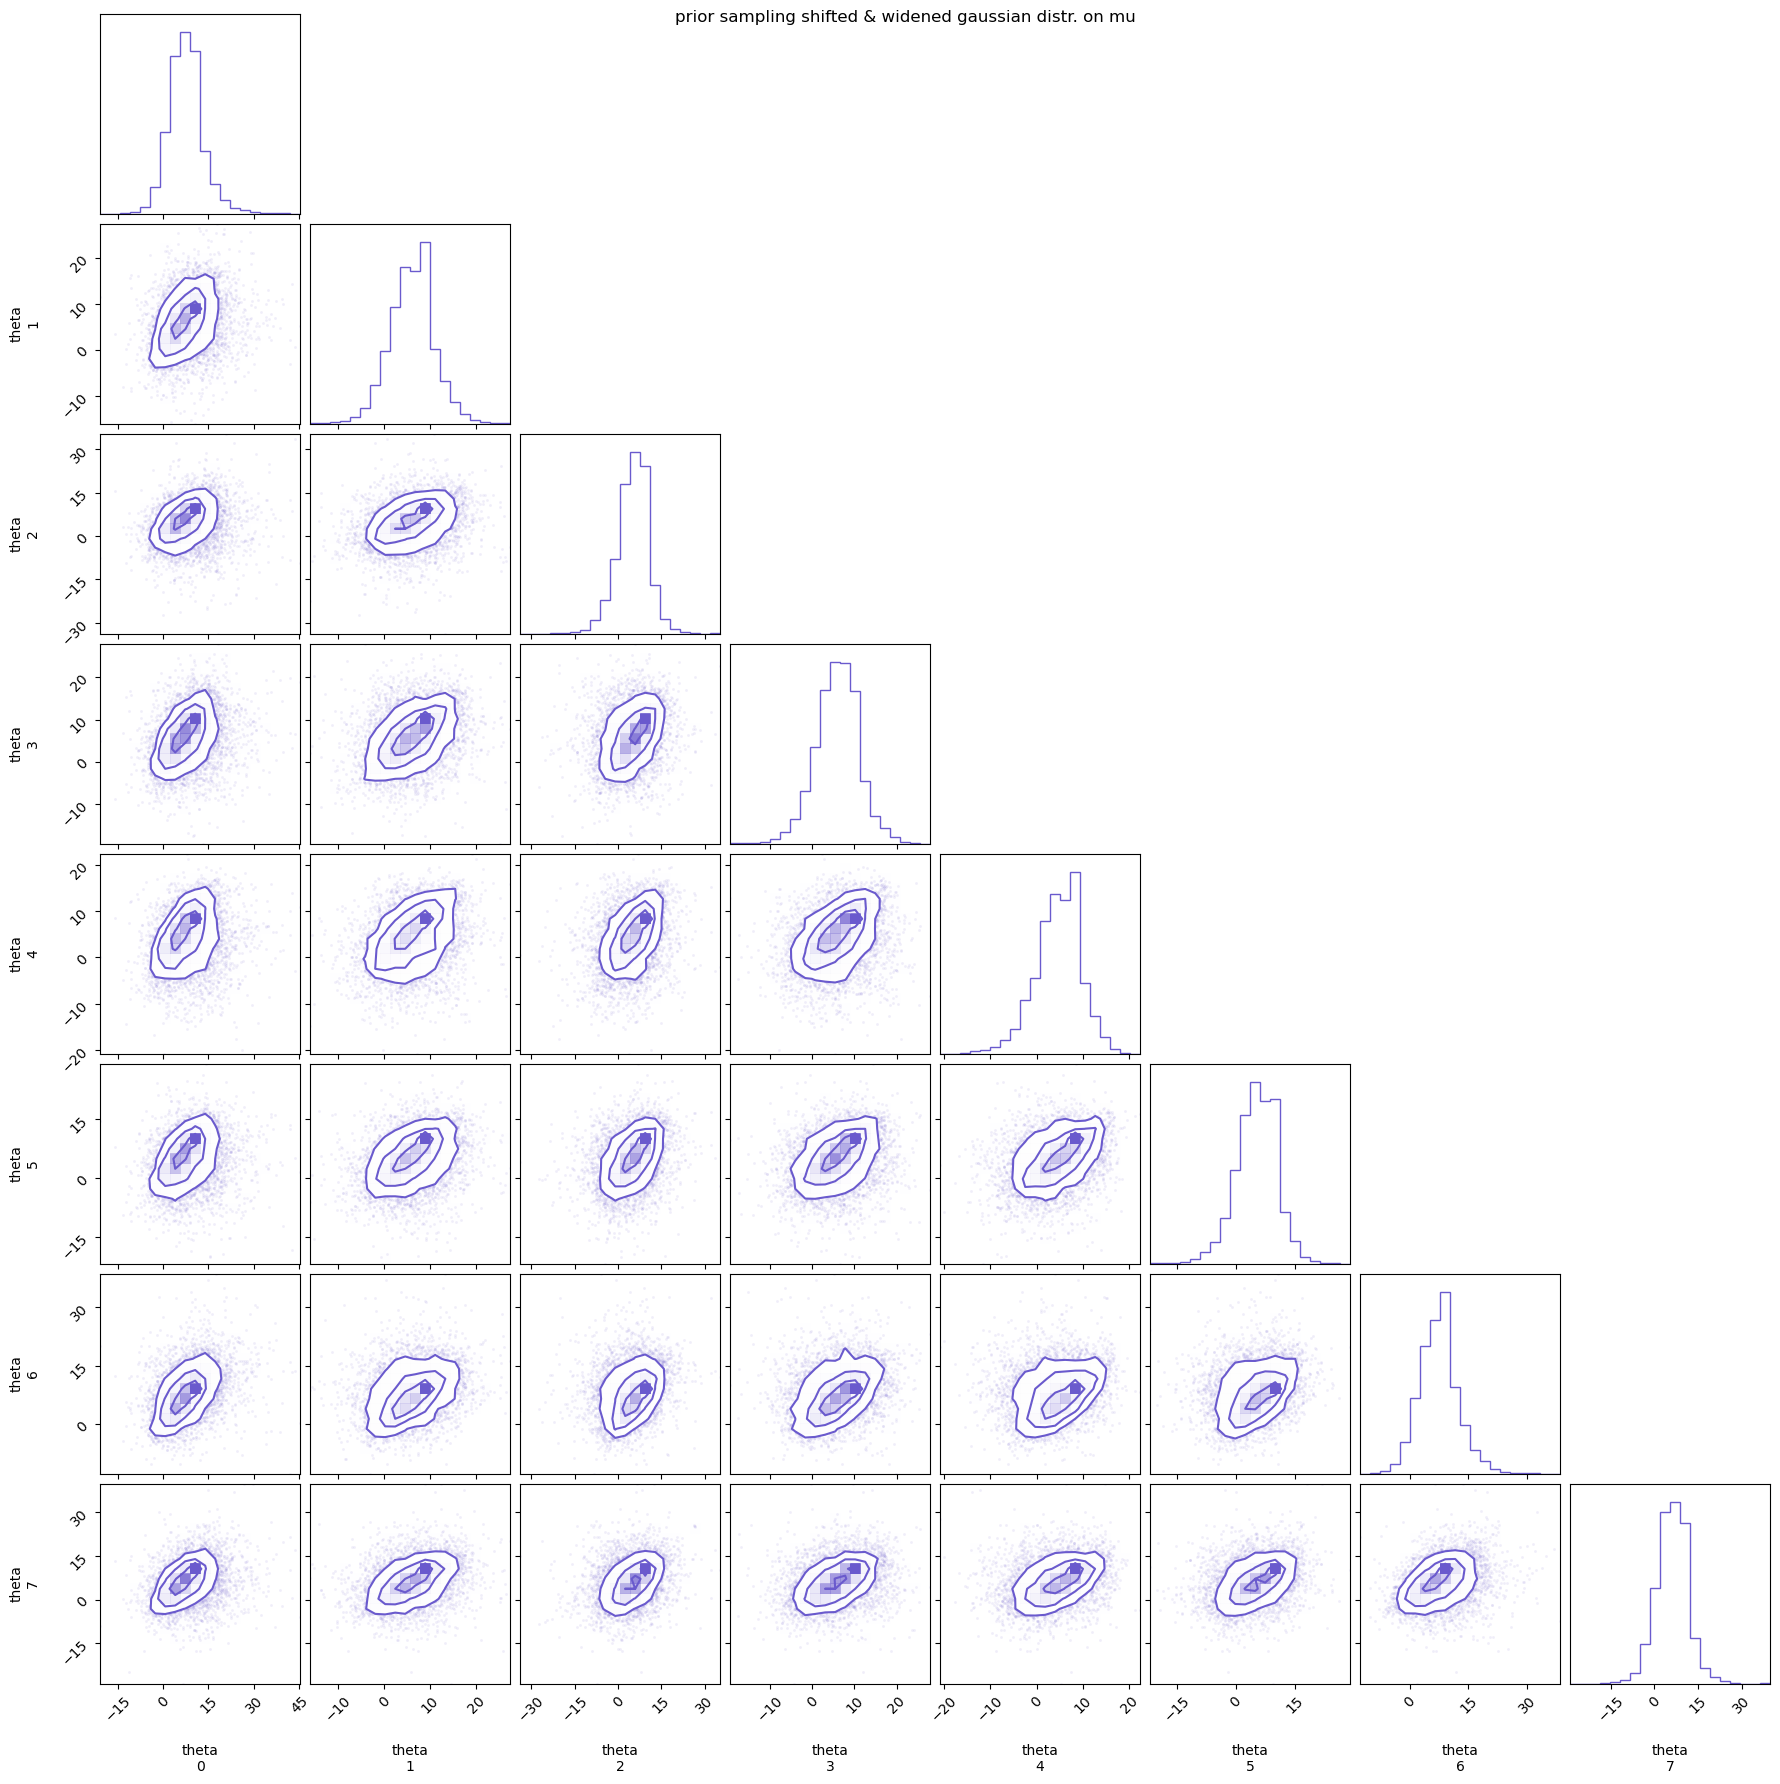

In [62]:
corner.corner(inf_data_newhyper, var_names=["theta"], color='slateblue');
plt.suptitle('prior sampling shifted & widened gaussian distr. on mu')

In [63]:
mcmc_newhyper.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
        mu      5.73      3.66      5.77     -0.55     11.09    248.41      1.00
       tau      3.87      3.27      3.00      0.44      7.92    214.56      1.01
  theta[0]      7.56      5.78      7.37     -2.25     15.88   1574.96      1.00
  theta[1]      6.11      4.85      6.16     -2.22     13.35    700.59      1.00
  theta[2]      5.13      5.67      5.48     -4.05     13.58    510.37      1.00
  theta[3]      5.99      5.08      6.12     -2.45     14.00    750.34      1.00
  theta[4]      4.70      4.95      5.03     -3.24     12.45    410.19      1.00
  theta[5]      5.26      5.19      5.55     -2.95     13.55    455.66      1.00
  theta[6]      7.54      5.07      7.47     -0.85     15.32   1355.77      1.00
  theta[7]      6.11      5.50      6.24     -2.58     14.78   1022.14      1.00

Number of divergences: 395


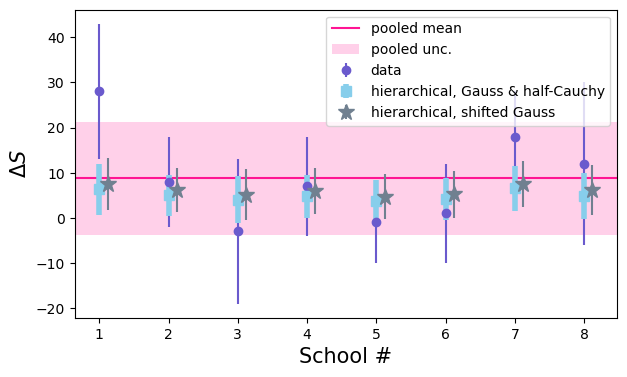

In [73]:
plt.figure(figsize=(7,4))
plt.axhline(pooled_mean, c='deeppink', label='pooled mean')
plt.axhspan(pooled_mean + pooled_unc, pooled_mean - pooled_unc, facecolor='deeppink', alpha=0.2, label='pooled unc.')

plt.errorbar(x_rng, improv, yerr = sigma_improv, fmt='o', c='slateblue', label='data', )
plt.ylabel(r"$\Delta S$", fontsize=15)
plt.xlabel("School #", fontsize=15)
#plt.legend()
#plt.show()




hier_mean = np.array([6.33,5.02,3.99,4.81,3.71,4.16,6.53,4.91])
hier_std = np.array([5.60,4.54,5.22,4.76,4.62,4.71,5.01,5.06])
plt.errorbar(x_rng, hier_mean, yerr = hier_std, fmt='s', c='skyblue', ms=7, lw=4, label='hierarchical, Gauss & half-Cauchy')
#plt.ylabel(r"$\Delta S$", fontsize=15)
#plt.xlabel("School #", fontsize=15)

hier_mean_new = np.array([7.56,6.11,5.13,5.99,4.70,5.26,7.54,6.11])
hier_std_new = np.array([5.78,4.85,5.67,5.08,4.95,5.19,5.07,5.50])
plt.errorbar(x_rng+0.12, hier_mean_new, yerr = hier_std_new, fmt='*', ms=12,  c='slategrey',  label='hierarchical, shifted Gauss')


plt.legend()
plt.show()

**"Test the sampler runs for convergence."** *Notice, some divergences were present in both of these hierarchical model runs:*

In [76]:
mcmc_moresamples.print_summary() # 14 divergences


                mean       std    median      5.0%     95.0%     n_eff     r_hat
        mu      4.48      3.24      4.56     -0.83      9.61    893.93      1.00
       tau      3.68      3.29      2.81      0.19      7.80    467.58      1.00
  theta[0]      6.33      5.60      5.85     -2.38     14.50   1263.75      1.00
  theta[1]      5.02      4.54      4.97     -1.96     12.67   1835.65      1.00
  theta[2]      3.99      5.22      4.23     -3.94     12.42   1738.48      1.00
  theta[3]      4.81      4.76      4.83     -2.59     12.61   1717.25      1.00
  theta[4]      3.71      4.62      4.03     -3.55     11.27   1389.71      1.00
  theta[5]      4.16      4.71      4.32     -3.55     11.40   1664.42      1.00
  theta[6]      6.53      5.01      6.11     -1.55     14.19   1201.51      1.00
  theta[7]      4.91      5.06      4.89     -3.16     12.68   1827.71      1.00

Number of divergences: 14


In [77]:
mcmc_newhyper.print_summary() # waaaaay more divergences!


                mean       std    median      5.0%     95.0%     n_eff     r_hat
        mu      5.73      3.66      5.77     -0.55     11.09    248.41      1.00
       tau      3.87      3.27      3.00      0.44      7.92    214.56      1.01
  theta[0]      7.56      5.78      7.37     -2.25     15.88   1574.96      1.00
  theta[1]      6.11      4.85      6.16     -2.22     13.35    700.59      1.00
  theta[2]      5.13      5.67      5.48     -4.05     13.58    510.37      1.00
  theta[3]      5.99      5.08      6.12     -2.45     14.00    750.34      1.00
  theta[4]      4.70      4.95      5.03     -3.24     12.45    410.19      1.00
  theta[5]      5.26      5.19      5.55     -2.95     13.55    455.66      1.00
  theta[6]      7.54      5.07      7.47     -0.85     15.32   1355.77      1.00
  theta[7]      6.11      5.50      6.24     -2.58     14.78   1022.14      1.00

Number of divergences: 395


**"Explore sampler behavior when using centered vs. off-centered parameterization."** *Maybe off-centered param. is the key to better convergence!*

In [78]:
from numpyro.infer.reparam import TransformReparam

# Eight Schools example - Non-centered Reparametrization
def eight_schools_noncentered(J, sigma, y=None):
    mu = numpyro.sample('mu', dist.Normal(0, 5))
    tau = numpyro.sample('tau', dist.HalfCauchy(5))
    with numpyro.plate('J', J):
        with numpyro.handlers.reparam(config={'theta': TransformReparam()}):
            theta = numpyro.sample('theta',
                                   dist.TransformedDistribution(dist.Normal(0., 1.),
                                                                dist.transforms.AffineTransform(mu, tau)))
            numpyro.sample('obs', dist.Normal(theta, sigma), obs=y)

nuts_kernel_noncentered = NUTS(eight_schools_noncentered)
mcmc_noncentered = MCMC(nuts_kernel_noncentered, num_warmup=500, num_samples=1000)
rng_key = random.PRNGKey(0)
mcmc_noncentered.run(rng_key, J=8, sigma=sigma_improv, y=improv, extra_fields=('potential_energy',))
mcmc_noncentered.print_summary(exclude_deterministic=False)  

sample: 100%|██████████| 1500/1500 [00:02<00:00, 724.51it/s, 7 steps of size 4.76e-01. acc. prob=0.89] 



                   mean       std    median      5.0%     95.0%     n_eff     r_hat
           mu      4.19      3.41      4.27     -1.74      9.07    689.87      1.00
          tau      3.82      4.04      2.85      0.00      8.08    283.09      1.00
     theta[0]      6.59      6.93      5.56     -2.13     15.32    419.87      1.00
     theta[1]      5.08      5.02      4.84     -2.98     12.49    610.92      1.00
     theta[2]      3.57      5.16      4.02     -4.36     11.65    861.96      1.00
     theta[3]      4.73      4.59      4.77     -2.92     11.76   1017.75      1.00
     theta[4]      3.41      4.79      3.93     -4.35     11.08    980.82      1.00
     theta[5]      3.88      4.88      4.13     -4.65     11.19   1010.85      1.00
     theta[6]      6.49      5.41      5.85     -1.64     13.87    516.49      1.00
     theta[7]      4.68      5.05      4.56     -3.76     11.60    735.83      1.00
theta_base[0]      0.31      0.97      0.33     -1.22      1.96    771.73  

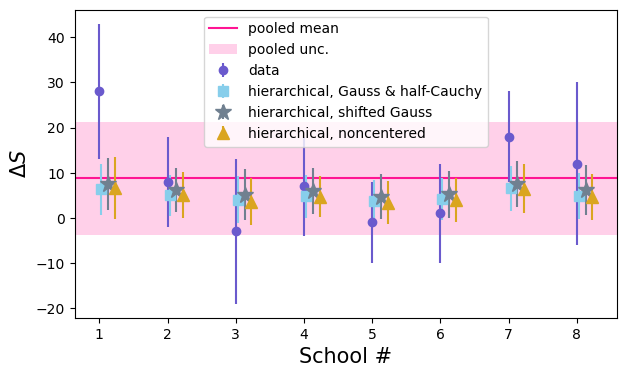

In [87]:
plt.figure(figsize=(7,4))
plt.axhline(pooled_mean, c='deeppink', label='pooled mean')
plt.axhspan(pooled_mean + pooled_unc, pooled_mean - pooled_unc, facecolor='deeppink', alpha=0.2, label='pooled unc.')

plt.errorbar(x_rng, improv, yerr = sigma_improv, fmt='o', c='slateblue', label='data', )
plt.ylabel(r"$\Delta S$", fontsize=15)
plt.xlabel("School #", fontsize=15)

hier_mean = np.array([6.33,5.02,3.99,4.81,3.71,4.16,6.53,4.91])
hier_std = np.array([5.60,4.54,5.22,4.76,4.62,4.71,5.01,5.06])
plt.errorbar(x_rng+0.03, hier_mean, yerr = hier_std, fmt='s', c='skyblue', ms=7, label='hierarchical, Gauss & half-Cauchy')

hier_mean_new = np.array([7.56,6.11,5.13,5.99,4.70,5.26,7.54,6.11])
hier_std_new = np.array([5.78,4.85,5.67,5.08,4.95,5.19,5.07,5.50])
plt.errorbar(x_rng+0.13, hier_mean_new, yerr = hier_std_new, fmt='*', ms=12,  c='slategrey',  label='hierarchical, shifted Gauss')

hier_mean_noncentered = np.array([6.59, 5.08, 3.57, 4.73, 3.41, 3.88, 6.49, 4.68])
hier_std_noncentered = np.array([6.93, 5.02, 5.16, 4.59, 4.79, 4.88, 5.41, 5.05])
plt.errorbar(x_rng+0.23, hier_mean_noncentered, yerr = hier_std_noncentered, fmt='^', ms=9,  c='goldenrod',  label='hierarchical, noncentered')


plt.legend()
plt.show()

*Looks like noncentered is great practice - it results in total convergence without changing the outcome of your sampling very much*

# Problem 2: The Five Districts

The test-prep program was expanded across five districts, for a total of 27 schools. For each school, the mean score improvement, uncertainty on the mean, and number of hours each student spent studying was recorded.


### Exercises

a) Load the Five Districts dataset (five_districts.csv) and plot the data


In [89]:
import pandas as pd

In [96]:
tab15 = pd.read_csv('five_districts.csv', names=['district', 'hours_studied', 'score_change', 'score_change_err'])

In [98]:
tab15[0]

KeyError: 0

b) Determine the expected score improvement per hour studied for each school using three different models:

+ i. A fully pooled model
+ ii. Independent estimates for each district
+ iii. A hierarchical model that asserts a relationship between the schools and districts.

For all three cases, sample from the posterior using a sampling method of your choice. Test the sampler runs for convergence. Explore sampler behavior when using centered vs. off-centered parameterization.

For the third option, draw the relationship as a directed acyclic graph. Justify your choices of distributions for parameters and hyper-parameters, and test your results for sensitivity to modeling choices.

# Problem 3: Dyson Spheres

Congratulations! You've detected a strange class of objects that you suspect are [Dyson spheres](https://en.wikipedia.org/wiki/Dyson_sphere). Your data are sparse, but you nonetheless detect hints of variability in each object's brightness.

a) Load the Dyson Sphere dataset (dyson_spheres.csv) and plot the time series data. What do you notice about the relative amplitude variations?

b) For each object, compute a Lomb-Scargle periodogram. What do you notice about the frequency-power plot?

c) Assume that each object's time series can be modeled as a single-component sinusoid. Construct a hierarchical model for the population, asserting some population-level relationship between the amplitudes, frequencies, and phases for each object's sinusoid. Which parameters might be expected to be correlated or independent of one another?

# Problem 4: Astrophysics

Select an astrophysical dataset of your choosing. Describe any hierarchical structure in the data using a directed acyclic graph. Build a simple hierarchical model for the data. You may wish to use only a few member objects of your dataset in order to more rapidly iterate while developing.